In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets

*Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).*

In [2]:
fetch_california_housing = datasets.fetch_california_housing(as_frame=True)
print(fetch_california_housing.DESCR)
df = fetch_california_housing.frame

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

*   MedInc: Cредний доход
*   HouseAge: Средний возраст дома
*   AveRooms: Cреднее количество комнат
*   AveBedrms: Среднее количество спален
*   Populaion: Население
*   AveOccup: Среднее количество членов домохозяйства 
*   Latitude: Широта группы
*   Longitude: Долгота группы

In [3]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


*Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.*

In [4]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

*Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое*

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
X1 = df.drop('MedHouseVal', axis=1)
y1 = df['MedHouseVal']

In [7]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

*Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.*

In [8]:
model = LinearRegression()
model.fit(X1_train, y1_train)
print('r2:', model.score(X1_train, y1_train), model.score(X1_test, y1_test))
print('RMSE:', mean_squared_error(y1_train, model.predict(X1_train)), mean_squared_error(y1_test, model.predict(X1_test)))

r2: 0.6125511913966952 0.575787706032451
RMSE: 0.5179331255246699 0.5558915986952442


Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

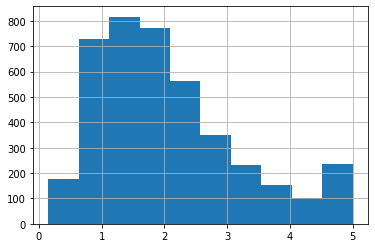

In [9]:
y1_test.hist()

Выбросы на графике распределения целевой переменной отсутствуют.

*Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.*

In [10]:
df_corr_matrix_1 = df.corr()
df_corr_matrix_1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


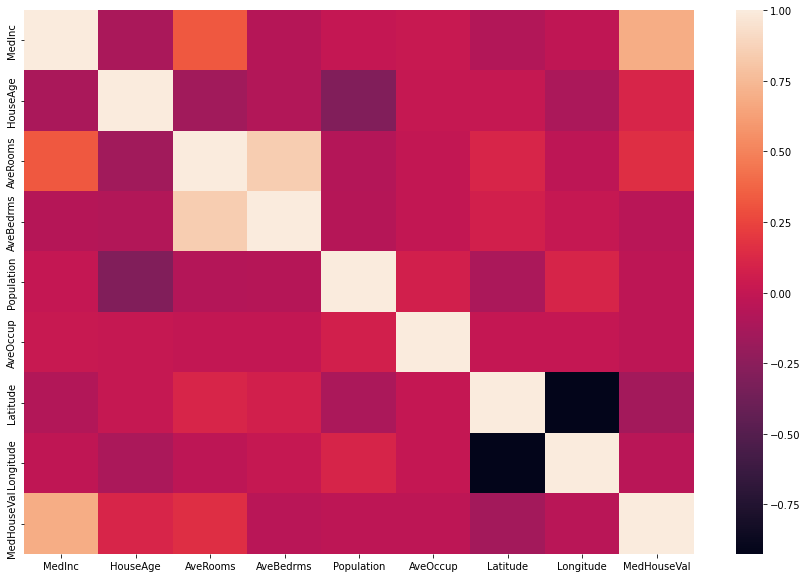

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

sns.heatmap(df_corr_matrix_1)

Высокая корреляция прослеживается между признаками AveBedrms и AveRooms. Удалим признак AveBedrms и посчитаем метрики

In [12]:
X2 = df.drop('MedHouseVal', axis=1)
y2 = df['MedHouseVal']
X2 = X2.drop('AveBedrms', axis=1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X2_train, y2_train)
print('r2:', model.score(X2_train, y2_train), model.score(X2_test, y2_test))
print('RMSE:', mean_squared_error(y2_train, model.predict(X2_train)), mean_squared_error(y2_test, model.predict(X2_test)))

r2: 0.5995238502055928 0.5823239094526445
RMSE: 0.5353477913864823 0.5473264990498136


Метрика r2 увеличилась на ~ 1%, среднеквадратичная ошибка уменьшилась на ~ 0,01 

In [13]:
X2

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32


Исследуйте оставленные признаки на выбросы.

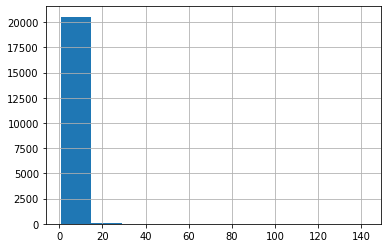

In [14]:
X2['AveRooms'].hist() # выброс AveRooms

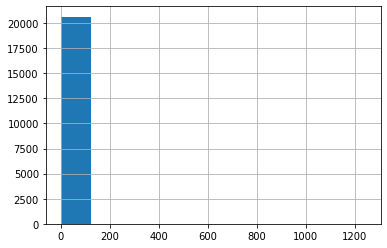

In [15]:
X2['AveOccup'].hist() # выброс AveOccup

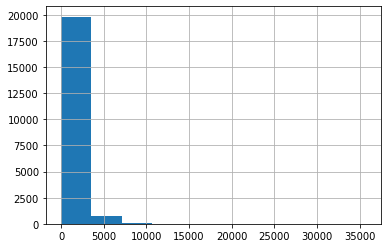

In [16]:
X2['Population'].hist() # выброс Population

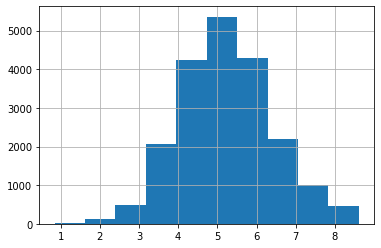

In [17]:
q98_AveRooms = X2['AveRooms'].quantile(0.98) # значение "AveRooms", ниже которого находится 98% данных
X2[X2['AveRooms'] < q98_AveRooms]['AveRooms'].hist() # гистограмма "AveRooms" без выбросов

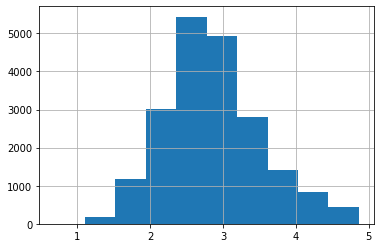

In [18]:
q98_AveOccup = X2['AveOccup'].quantile(0.98) # значение "AveOccup", ниже которого находится 98% данных
X2[X2['AveOccup'] < q98_AveOccup]['AveOccup'].hist() # гистограмма "AveOccup" без выбросов

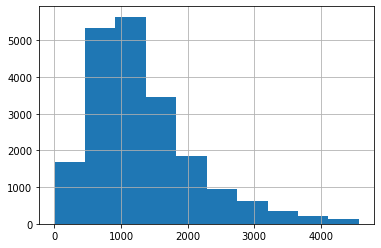

In [19]:
q98_Population = X2['Population'].quantile(0.98) # значение "Population", ниже которого находится 98% данных
X2[X2['Population'] < q98_Population]['Population'].hist() # гистограмма "Population" без выбросов

In [20]:
X2.loc[X2.AveRooms > q98_AveRooms, 'AveRooms'] = np.nan
X2.loc[X2.AveOccup > q98_AveOccup, 'AveOccup'] = np.nan
X2.loc[X2.Population > q98_Population, 'Population'] = np.nan

In [21]:
X2 = X2[~X2['AveRooms'].isna()] # удаляем NaN
X2 = X2[~X2['AveOccup'].isna()] # удаляем NaN
X2 = X2[~X2['Population'].isna()] # удаляем NaN

In [22]:
X2

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32


In [23]:
X3 = X2
y3 = pd.DataFrame(y2).iloc[X3.index, :]
y3

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X3_train, y3_train)
print('r2:', model.score(X3_train, y3_train), model.score(X3_test, y3_test))
print('RMSE:', mean_squared_error(y3_train, model.predict(X3_train)), mean_squared_error(y3_test, model.predict(X3_test)))

r2: 0.6613221718994271 0.6672643713243078
RMSE: 0.4447766063051236 0.4488438884401487


Метрика r2 увеличилась на ~ 9%, среднеквадратичная ошибка уменьшилась на ~ 0,11 

*Измените несколько признаков на выбор математически*

In [24]:
X3

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32


In [25]:
X3['Population'] = X3['Population'].apply(lambda x: np.log(x))
X3['AveRooms'] = X3['AveRooms'].apply(lambda x: x**2)

In [26]:
X3

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,48.778030,5.774552,2.555556,37.88,-122.23
1,8.3014,21.0,38.914354,7.783641,2.109842,37.86,-122.22
2,7.2574,52.0,68.693192,6.206576,2.802260,37.85,-122.24
3,5.6431,52.0,33.841580,6.324359,2.547945,37.85,-122.25
4,3.8462,52.0,39.461681,6.336826,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...
20635,1.5603,25.0,25.456612,6.739337,2.560606,39.48,-121.09
20636,2.5568,18.0,37.381425,5.874931,3.122807,39.49,-121.21
20637,1.7000,17.0,27.097675,6.914731,2.325635,39.43,-121.22
20638,1.8672,18.0,28.403708,6.608001,2.123209,39.43,-121.32


In [27]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X3_train, y3_train)
print('r2:', model.score(X3_train, y3_train), model.score(X3_test, y3_test))
print('RMSE:', mean_squared_error(y3_train, model.predict(X3_train)), mean_squared_error(y3_test, model.predict(X3_test)))

r2: 0.6592526792185447 0.6665406132980687
RMSE: 0.4474944161379623 0.44982020218232244


Арифметические преобразования признаков практически не повлияли на метрики модели (<1%)

Выводы:

В ходе работы была обучена модель линейной регрессии. 

Затем была проведена работа с признаками модели:

*   Удаление одного из признаков с высоким коэффициентом корреляции;
*   Удаление данных с выбросами;
*   Математические преобразования признаков

В результате работы, наибольшее положительное влияние на исследуемые метрики оказала работа с выбросами и исследование корелляционной матрицы.





